In [1]:
import uproot4
import awkward
import numpy as np
from uproot_methods import TLorentzVectorArray

from coffea.processor import LazyDataFrame
from coffea.analysis_objects import JaggedCandidateArray


In [2]:
fn = '/hadoop/cms/store/user/legianni/ProjectMetis/HHggtautau_Era2018_private_prova_vera/test_nanoaodSkim_3.root'
file = uproot4.open(fn)

In [3]:
tree = file['Events']
df = LazyDataFrame(tree, flatten=False)

#tree.keys()

In [4]:
# create photon candidates
photons = JaggedCandidateArray.candidatesfromcounts(
    df['nPhoton'],
    pt=df['Photon_pt'].content,
    eta=df['Photon_eta'].content,
    phi=df['Photon_phi'].content,
    mass=df['Photon_mass'].content,
)

In [5]:
# check if photons and the index array have equal length (that should always be the case, but just to be sure)
len(photons) == len(df['gHidx'])

True

In [6]:
# check the indices
df['gHidx']

<JaggedArray [[0 2] [0 2] [0 1] ... [-1 -1] [-1 -1] [0 1]] at 0x7ff6fec55898>

In [7]:
# some of the indices are -1 -> this will be problematic. let's throw them away
df['gHidx'][(df['gHidx']>=0)]

<JaggedArray [[0 2] [0 2] [0 1] ... [] [] [0 1]] at 0x7ff6febf45f8>

In [8]:
# look at some of the photon pts so that we can be sure we're really selecting the right photons in the end
photons.pt

<JaggedArray [[223.92703 137.99004 110.93973 90.21473 101.65603 88.09794] [121.273 59.024254 25.527027] [158.28708 151.59003 62.73162] ... [53.33714 30.271727 18.597582 15.280681] [93.65514 48.216213 35.191925] [68.64432 53.799282 46.529034 23.732985]] at 0x7ff6febf4860>

In [9]:
# as expected, using the indices that are not cleaned from -1 values selects some photons that shouldn't be there,
# e.g. in the second to last event
photons[df['gHidx']].pt

<JaggedArray [[223.92703 110.93973] [121.273 25.527027] [158.28708 151.59003] ... [15.280681 15.280681] [35.191925 35.191925] [68.64432 53.799282]] at 0x7ff6febf4160>

In [10]:
# this is fixed when we just use indices that are greater or equal to 0
photons[df['gHidx'][(df['gHidx']>=0)]].pt

<JaggedArray [[223.92703 110.93973] [121.273 25.527027] [158.28708 151.59003] ... [] [] [68.64432 53.799282]] at 0x7ff72c1554a8>

In [11]:
selected_photons = photons[df['gHidx'][(df['gHidx']>=0)]]
diphoton = selected_photons.choose(2)

In [17]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import mplhep
plt.style.use(mplhep.style.CMS)

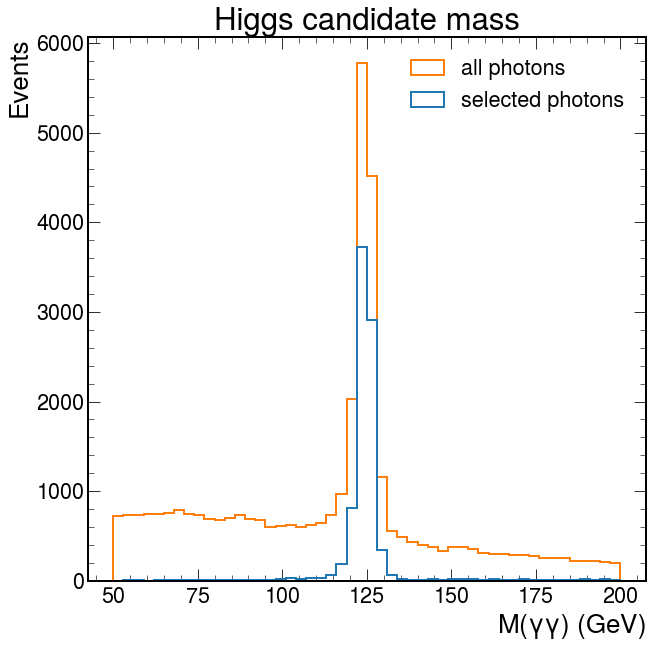

In [18]:
figure=plt.figure(1)
plt.hist([diphoton.mass.flatten(), photons.choose(2).mass.flatten()], label=['selected photons', 'all photons'], bins=50, range=[50, 200], histtype='step', linewidth=2)
plt.xlabel(r'$M(\gamma\gamma)$ (GeV)')
plt.ylabel('Events')
plt.title('Higgs candidate mass')
plt.legend()
plt.show()
